In [1]:
import numpy as np
from network import Network
from layers import Dense, ActivationLayer
from activations import Activations #tanh,sigmoid,tanh_prime,sigmoid_prime
from loss import mse, mse_prime, binary_cross_entropy, bce_prime


In [2]:
# training data
x_train = np.array(
    [[0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0]]
)
x_train = np.reshape(x_train,(8,8,1))
y_train = x_train
x_train.shape #(8,8,1)
x_train[0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [10]:
# define the auto encoder network
net = Network()
net.add(Dense(8,3,'FC_1'))
net.add(Dense(3,8,'FC_2'))
# add sigmoid adctivation in the last layer
net.add(ActivationLayer('sigmoid', 'activ_1'))
# use MSE as the loss
net.use_loss(mse,mse_prime)


layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)


In [11]:
# Train
history = net.fit(x_train, y_train, epochs=10000, learning_rate=0.1, print_freq = 100)

epoch 1/10000  error =0.23271172250444286
epoch 101/10000  error =0.10668539976886965
epoch 201/10000  error =0.10105524606126502
epoch 301/10000  error =0.0913857557464438
epoch 401/10000  error =0.0804200911390642
epoch 501/10000  error =0.07285493751882567
epoch 601/10000  error =0.0667352593453319
epoch 701/10000  error =0.061181068452545374
epoch 801/10000  error =0.057298598997997344
epoch 901/10000  error =0.05445902396978407
epoch 1001/10000  error =0.05174581887004552
epoch 1101/10000  error =0.04858044257889087
epoch 1201/10000  error =0.044999131632847224
epoch 1301/10000  error =0.041656544229161374
epoch 1401/10000  error =0.03895268311482896
epoch 1501/10000  error =0.036869836274695665
epoch 1601/10000  error =0.035271181343873304
epoch 1701/10000  error =0.0340290976518667
epoch 1801/10000  error =0.033046539163783493
epoch 1901/10000  error =0.03225401382366551
epoch 2001/10000  error =0.03160265246122732
epoch 2101/10000  error =0.031057916841751024
epoch 2201/10000  

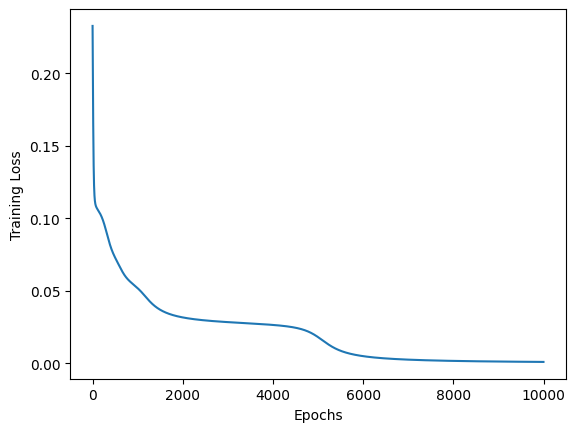

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.plot(history)
plt.show()


In [17]:
# predict
print('testing with training data')
out = net.predict(x_train)
print(f"Actual Input: \n{np.reshape(x_train,(8,8))}")
print(f"Predicted Output: \n {np.reshape(np.round(out,2),(8,8))}")

testing with training data
Actual Input: 
[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]
Predicted Output: 
 [[0.   0.   0.04 0.   0.04 0.   0.01 0.95]
 [0.   0.04 0.03 0.02 0.05 0.   0.91 0.03]
 [0.04 0.04 0.   0.   0.   0.95 0.   0.  ]
 [0.   0.   0.   0.03 0.95 0.   0.03 0.03]
 [0.   0.03 0.   0.95 0.03 0.   0.01 0.  ]
 [0.05 0.   0.94 0.   0.   0.   0.01 0.04]
 [0.   0.93 0.   0.05 0.   0.05 0.02 0.  ]
 [0.95 0.   0.04 0.   0.   0.04 0.   0.  ]]


# Running Multiple Experiments To check convergence 


In [18]:
def train_loop():
    exp = {}
    for i in range(10):
        # define the auto encoder network
        net = Network()
        net.add(Dense(8,3,'FC_1'))
        net.add(Dense(3,8,'FC_2'))
        # add sigmoid adctivation in the last layer
        net.add(ActivationLayer('sigmoid', 'activ_1'))
        # use MSE as the loss
        net.use_loss(mse,mse_prime)
        # Train
        history = net.fit(x_train, y_train, epochs=100, learning_rate=0.1, print_freq = 100)
        exp[f"exp_{i}"] = history
        plt.plot(history)
    plt.legend(list(exp.keys()))
    plt.xlabel("Epochs")
    plt.ylabel("Training Loss")
    plt.title("Training loss curves for differnet experiments.")
    plt.show()


layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.2648139081749757
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.27416921472974165
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.26128484684460235
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.2617820313351644
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.26026386032767646
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.257539221356861
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights shape- >(8, 3)
epoch 1/100  error =0.27549052420362824
layer ->FC_1 initiated Weights shape- >(3, 8)
layer ->FC_2 initiated Weights sha

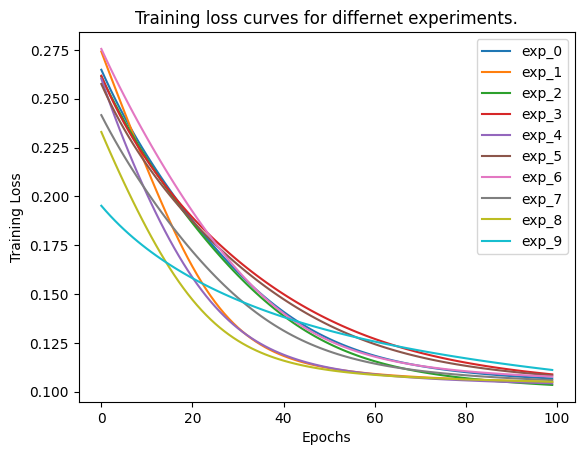

In [19]:
train_loop()

# Analyze Weights

In [26]:
# get the trained weights
dense_layer_1_weights = net.layers[0].weights
dense_layer_2_weights = net.layers[1].weights

# get the trained weights
dense_layer_1_bias = net.layers[0].bias
dense_layer_2_bias = net.layers[1].bias

In [27]:
dense_layer_1_weights

array([[-1.87236126,  1.31090217, -2.60161048,  4.7462395 ,  2.87909741,
         0.57054967, -1.26594052, -0.40654368],
       [ 0.5318026 , -2.6706985 ,  1.58243102, -0.32776418,  3.11793606,
        -2.12261124, -1.22115401,  4.11732839],
       [ 4.29216836,  0.15666221,  0.30535887, -1.00232859, -2.33377704,
         4.09278644, -2.13162752, -1.33915298]])

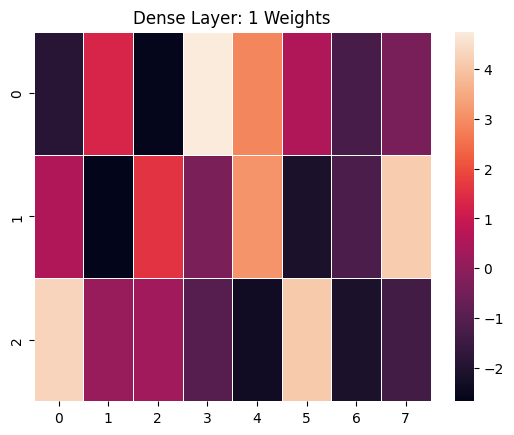

In [34]:
import seaborn as sns
ax = sns.heatmap(dense_layer_1_weights, linewidth=0.5)
plt.title('Dense Layer: 1 Weights')
plt.show()

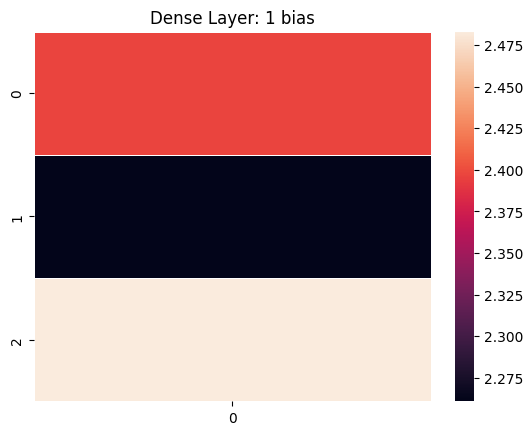

In [35]:
ax = sns.heatmap(dense_layer_1_bias, linewidth=0.5)
plt.title('Dense Layer: 1 bias')
plt.show()

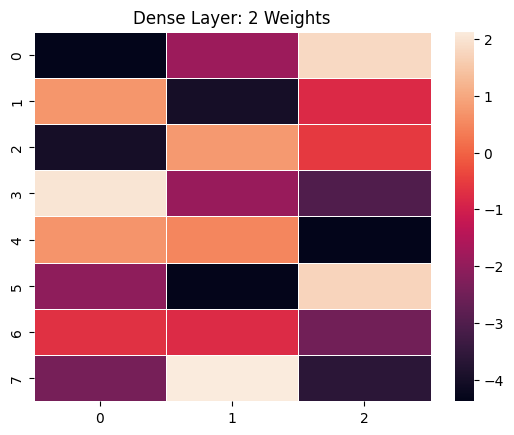

In [25]:
ax = sns.heatmap(dense_layer_2_weights, linewidth=0.5)
plt.title('Dense Layer: 2 Weights')
plt.show()

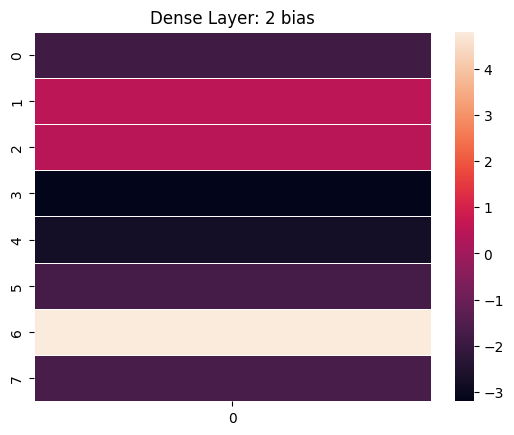

In [36]:
ax = sns.heatmap(dense_layer_2_bias, linewidth=0.5)
plt.title('Dense Layer: 2 bias')
plt.show()